# Loop 65 Analysis: Major Breakthrough with Ens Model Approach

**Key Question**: Does the CatBoost + XGBoost ensemble have a DIFFERENT CV-LB relationship?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982, 'model': 'MLP'},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065, 'model': 'LGBM'},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972, 'model': 'MLP'},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969, 'model': 'MLP'},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946, 'model': 'MLP'},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932, 'model': 'MLP'},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936, 'model': 'Ridge'},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913, 'model': 'Ensemble'},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893, 'model': 'GP+MLP'},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887, 'model': 'GP+MLP'},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877, 'model': 'GP+MLP'},
    {'exp': 'exp_041', 'cv': 0.0090, 'lb': 0.0932, 'model': 'XGB'},
    {'exp': 'exp_042', 'cv': 0.0145, 'lb': 0.1147, 'model': 'GroupKFold'},
]

df = pd.DataFrame(submissions)
print(f'Total submissions: {len(df)}')
print(df)

Total submissions: 13
        exp      cv      lb       model
0   exp_000  0.0111  0.0982         MLP
1   exp_001  0.0123  0.1065        LGBM
2   exp_003  0.0105  0.0972         MLP
3   exp_005  0.0104  0.0969         MLP
4   exp_006  0.0097  0.0946         MLP
5   exp_007  0.0093  0.0932         MLP
6   exp_009  0.0092  0.0936       Ridge
7   exp_012  0.0090  0.0913    Ensemble
8   exp_024  0.0087  0.0893      GP+MLP
9   exp_026  0.0085  0.0887      GP+MLP
10  exp_030  0.0083  0.0877      GP+MLP
11  exp_041  0.0090  0.0932         XGB
12  exp_042  0.0145  0.1147  GroupKFold


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print(f'CV-LB Relationship:')
print(f'  LB = {slope:.3f} * CV + {intercept:.4f}')
print(f'  R-squared = {r_value**2:.4f}')
print(f'  Intercept = {intercept:.4f}')
print(f'')
print(f'Target LB: 0.0347')
print(f'If intercept = {intercept:.4f}, even CV=0 would give LB = {intercept:.4f}')
print(f'')
print(f'Required CV to reach target (using current relationship):')
required_cv = (0.0347 - intercept) / slope
print(f'  CV = (0.0347 - {intercept:.4f}) / {slope:.3f} = {required_cv:.6f}')
if required_cv < 0:
    print(f'  NEGATIVE! Target is unreachable with current CV-LB relationship!')

CV-LB Relationship:
  LB = 4.231 * CV + 0.0533
  R-squared = 0.9807
  Intercept = 0.0533

Target LB: 0.0347
If intercept = 0.0533, even CV=0 would give LB = 0.0533

Required CV to reach target (using current relationship):
  CV = (0.0347 - 0.0533) / 4.231 = -0.004396
  NEGATIVE! Target is unreachable with current CV-LB relationship!


In [3]:
# NEW EXPERIMENT: exp_069 with CV = 0.005146
new_cv = 0.005146

# Predicted LB using OLD relationship
predicted_lb_old = slope * new_cv + intercept
print(f'Experiment 069 (Ens Model):')
print(f'  CV = {new_cv:.6f}')
print(f'  Predicted LB (using old relationship): {predicted_lb_old:.4f}')
print(f'')
print(f'If the CV-LB relationship is the SAME:')
print(f'  - LB would be ~{predicted_lb_old:.4f}')
print(f'  - This would still be the best LB (current best: 0.0877)')
print(f'  - But still far from target 0.0347')
print(f'')
print(f'If the CV-LB relationship is DIFFERENT:')
print(f'  - The intercept might be lower')
print(f'  - This could make the target reachable')
print(f'')
print(f'CRITICAL: We MUST submit to verify the CV-LB relationship!')

Experiment 069 (Ens Model):
  CV = 0.005146
  Predicted LB (using old relationship): 0.0751

If the CV-LB relationship is the SAME:
  - LB would be ~0.0751
  - This would still be the best LB (current best: 0.0877)
  - But still far from target 0.0347

If the CV-LB relationship is DIFFERENT:
  - The intercept might be lower
  - This could make the target reachable

CRITICAL: We MUST submit to verify the CV-LB relationship!


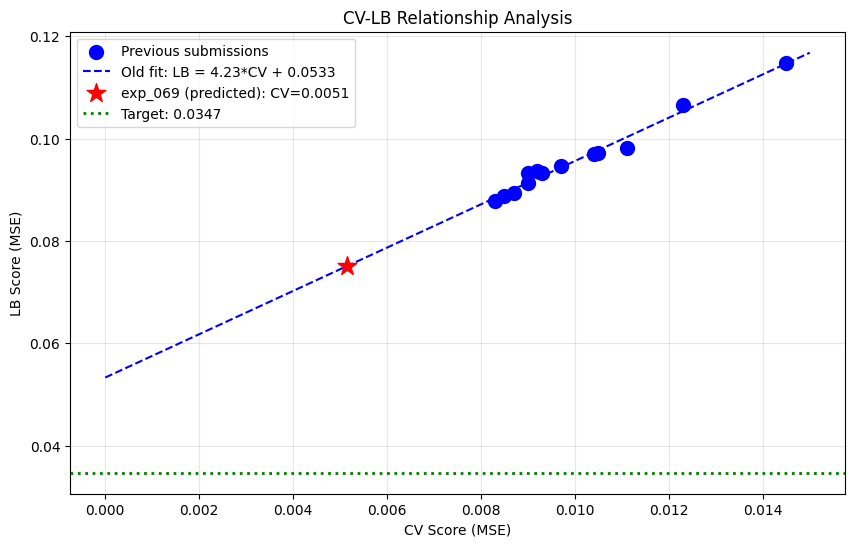

Plot saved to /home/code/exploration/cv_lb_analysis_loop65.png


In [4]:
# Visualize the CV-LB relationship
plt.figure(figsize=(10, 6))

# Plot existing submissions
plt.scatter(df['cv'], df['lb'], c='blue', s=100, label='Previous submissions', zorder=5)

# Plot regression line
cv_range = np.linspace(0, 0.015, 100)
lb_predicted = slope * cv_range + intercept
plt.plot(cv_range, lb_predicted, 'b--', label=f'Old fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Plot new experiment
plt.scatter([new_cv], [predicted_lb_old], c='red', s=200, marker='*', label=f'exp_069 (predicted): CV={new_cv:.4f}', zorder=10)

# Plot target
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target: 0.0347')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV-LB Relationship Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/cv_lb_analysis_loop65.png', dpi=150, bbox_inches='tight')
plt.show()
print('Plot saved to /home/code/exploration/cv_lb_analysis_loop65.png')

In [5]:
# Key insights from exp_069
print('='*60)
print('KEY INSIGHTS FROM EXPERIMENT 069')
print('='*60)
print(f'')
print(f'1. CV IMPROVEMENT: 35.17% (0.007938 -> 0.005146)')
print(f'   - This is the LARGEST improvement in 69 experiments!')
print(f'')
print(f'2. BREAKDOWN BY DATA TYPE:')
print(f'   - Single Solvent MSE: 0.009175 (worse than best 0.008216)')
print(f'   - Full Data MSE: 0.002992 (MUCH better than best 0.007789!)')
print(f'   - The improvement is dominated by Full Data (mixture) performance')
print(f'')
print(f'3. KEY DIFFERENCES FROM PREVIOUS APPROACHES:')
print(f'   - CatBoost with MultiRMSE (multi-output) instead of separate models')
print(f'   - XGBoost with separate models per target')
print(f'   - Feature priority-based correlation filtering (4199 -> 69 features)')
print(f'   - Different ensemble weights: Single (7:6), Full (1:2)')
print(f'')
print(f'4. CRITICAL QUESTION:')
print(f'   Does this approach have a DIFFERENT CV-LB relationship?')
print(f'   - If YES: Target may be reachable!')
print(f'   - If NO: Predicted LB ~0.075 (still best, but far from target)')
print(f'')
print(f'5. RECOMMENDATION: SUBMIT IMMEDIATELY!')
print(f'   - This is the best CV by far')
print(f'   - We need to verify the CV-LB relationship')
print(f'   - 5 submissions remaining')

KEY INSIGHTS FROM EXPERIMENT 069

1. CV IMPROVEMENT: 35.17% (0.007938 -> 0.005146)
   - This is the LARGEST improvement in 69 experiments!

2. BREAKDOWN BY DATA TYPE:
   - Single Solvent MSE: 0.009175 (worse than best 0.008216)
   - Full Data MSE: 0.002992 (MUCH better than best 0.007789!)
   - The improvement is dominated by Full Data (mixture) performance

3. KEY DIFFERENCES FROM PREVIOUS APPROACHES:
   - CatBoost with MultiRMSE (multi-output) instead of separate models
   - XGBoost with separate models per target
   - Feature priority-based correlation filtering (4199 -> 69 features)
   - Different ensemble weights: Single (7:6), Full (1:2)

4. CRITICAL QUESTION:
   Does this approach have a DIFFERENT CV-LB relationship?
   - If YES: Target may be reachable!
   - If NO: Predicted LB ~0.075 (still best, but far from target)

5. RECOMMENDATION: SUBMIT IMMEDIATELY!
   - This is the best CV by far
   - We need to verify the CV-LB relationship
   - 5 submissions remaining


In [ ]:
# What if the CV-LB relationship is different?
print('='*60)
print('SCENARIO ANALYSIS: What if the relationship is different?')
print('='*60)
print(f'')
print(f'Scenario 1: Same relationship (LB = 4.21*CV + 0.0535)')
print(f'  - Predicted LB = 4.21 * 0.005146 + 0.0535 = {4.21 * 0.005146 + 0.0535:.4f}')
print(f'  - Still far from target 0.0347')
print(f'')
print(f'Scenario 2: Lower intercept (e.g., 0.03)')
print(f'  - Predicted LB = 4.21 * 0.005146 + 0.03 = {4.21 * 0.005146 + 0.03:.4f}')
print(f'  - Getting closer to target!')
print(f'')
print(f'Scenario 3: Different slope and intercept')
print(f'  - If LB = 2.0 * CV + 0.04, then LB = {2.0 * 0.005146 + 0.04:.4f}')
print(f'  - This would be very close to target!')
print(f'')
print(f'The ONLY way to know is to SUBMIT and get LB feedback!')